Cancer is one of the leading causes of death in the developed world. Therefore, it is crucial that we investigate the links between cancer mortality rates and demographic data in varying counties of the United States. Using a dataset imported from data.world that aggregates data from the American Community Survey, clinicaltrails.gov (a public clinical trial database), and the National Cancer Institute, we hope to predict the cancer mortality rate of a county using demographic data. Our question is the following: if given the median age and income of a county in the United States, what will be the cancer mortality rate of that county? Our claim is that a county with a higher median age and lower median income will lead to higher cancer mortality rates.

In [49]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

url <- "https://raw.githubusercontent.com/mimilht/dsci100-proj-group70/main/cancer_reg.csv"
cancer_data <- read_csv(url)
cancer_data <- cancer_data |> 
    select(medIncome, MedianAge, avgAnnCount, avgDeathsPerYear, TARGET_deathRate) |>
    filter(na.rm = TRUE) |>
    filter(MedianAge <= 100)
head(cancer_data)

Rows: 3047 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


medIncome,MedianAge,avgAnnCount,avgDeathsPerYear,TARGET_deathRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
61898,39.3,1397,469,164.9
48127,33.0,173,70,161.3
49348,45.0,102,50,174.7
44243,42.8,427,202,194.8
49955,48.3,57,26,144.4
52313,45.4,428,152,176.0


In [50]:
cancer_split <- initial_split(cancer_data, prop = 0.75, strata = TARGET_deathRate)
cancer_training <- training(cancer_split)
cancer_test <- testing(cancer_split)

cancer_max <- map_df(cancer_training, max)
cancer_max

medIncome,MedianAge,avgAnnCount,avgDeathsPerYear,TARGET_deathRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
122641,65.3,38150,14010,293.9


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



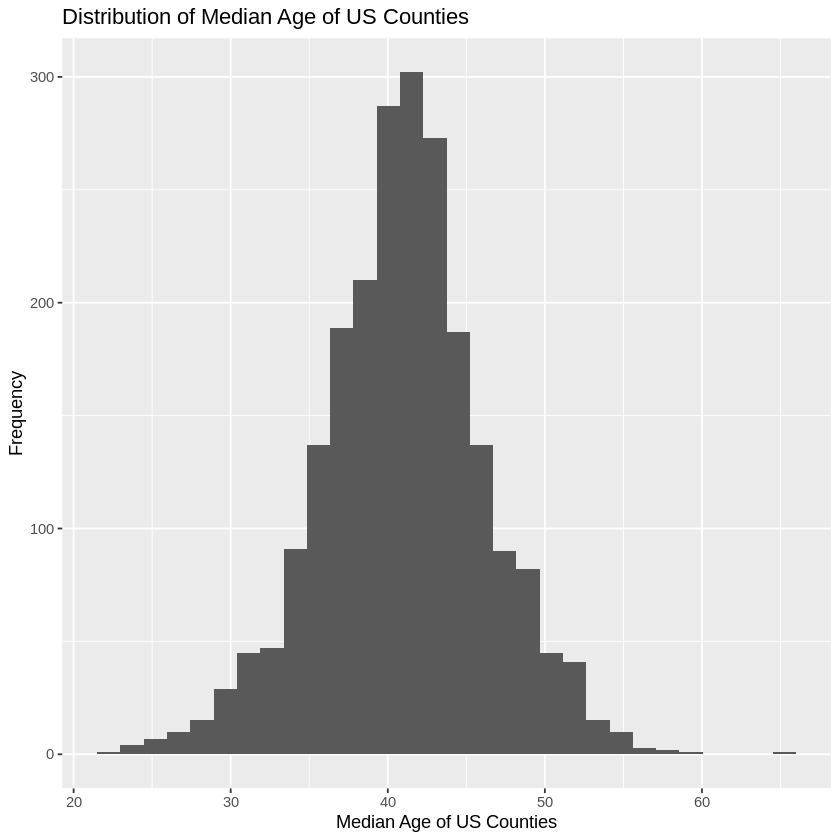

In [51]:
cancer_plots <- ggplot(cancer_training, aes(x = MedianAge)) +
    geom_histogram() +
    labs(x = "Median Age of US Counties", y = "Frequency") +
    ggtitle("Distribution of Median Age of US Counties")
cancer_plots